# FACIAL EMOTION CLASSIFICATION

# Step 1: Problem Identification and Description


# Step - 2 Data Collection

## For scraping images to create our dataset we have used 2 sources -
1. Google Image search
2. Instagram

Google image seach was built using chromedriver and follows these steps -
1. Open chrome windows
2. Search google images with the provided query string
3. Click on each image in the results
4. Get the link for the the images
5. After all links are collected for a query, the images are downloaded and saved

Instagram hastag approach followed these steps -
1.
2.
3.

#### Scraping data from google images

In [7]:
import selenium
from selenium import webdriver
import time
import requests
import os
from PIL import Image
import io
import hashlib
import cv2

In [29]:
def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
             
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                break
        else:
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [30]:
def download_image(folder_path:str,file_name:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        pass

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        folder_path = os.path.join(folder_path,file_name)
        if os.path.exists(folder_path):
            file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        else:
            os.mkdir(folder_path)
            file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
    except Exception as e:
        pass

#### Chromedriver
- chromedriver.exe is used to open a chrome browser window before can start scraping data.
- The proper chrome driver can be download from : https://chromedriver.chromium.org/downloads
- We have included the chromedriver for windows with our repository

In [31]:
# Setting the path for chrome driver
CHROME_DRIVER_PATH = os.path.abspath('./') + "\chromedriver.exe"

#### Downloading images for category : "happy"

In [37]:
%%capture
queries = ["happy human face", "happy black man face", "happy white man face", "happy black woman face", "happy white woman face", "happy asian face", "happy indian man face", "happy indian woman face"]
for query in queries:
    wd = webdriver.Chrome(executable_path=CHROME_DRIVER_PATH)
    wd.get('https://google.com')
    search_box = wd.find_element_by_css_selector('input.gLFyf')
    search_box.send_keys(query)
    links = fetch_image_urls(query,100,wd)
    images_path = os.path.abspath('./') + '/downloaded_data'
    if not os.path.exists(images_path):
        os.mkdir(images_path)
    for i in links:
        download_image(images_path,query,i)
    wd.quit()

#### Downloading images for category : "sad"

In [35]:
%%capture
queries = ["sad human face", "sad black man face", "sad white man face", "sad black woman face", "sad white woman face", "sad asian face", "sad indian man face", "sad indian woman face"]
for query in queries:
    wd = webdriver.Chrome(executable_path=CHROME_DRIVER_PATH)
    wd.get('https://google.com')
    search_box = wd.find_element_by_css_selector('input.gLFyf')
    search_box.send_keys(query)
    links = fetch_image_urls(query,100,wd)
    images_path = os.path.abspath('./') + '/downloaded_data'
    if not os.path.exists(images_path):
        os.mkdir(images_path)
    for i in links:
        download_image(images_path,query,i)
    wd.quit()

#### Downloading images for category : "angry"

In [23]:
%%capture
queries = ["angry human face", "angry black man face", "angry white man face", "angry black woman face", "angry white woman face", "angry asian face", "angry indian man face", "angry indian woman face"]
for query in queries:
    wd = webdriver.Chrome(executable_path=CHROME_DRIVER_PATH)
    wd.get('https://google.com')
    search_box = wd.find_element_by_css_selector('input.gLFyf')
    search_box.send_keys(query)
    links = fetch_image_urls(query,100,wd)
    images_path = os.path.abspath('./') + '/downloaded_data'
    for i in links:
        download_image(images_path,query,i)
    wd.quit()

#### Downloading images for category : "disgusted"

In [24]:
%%capture
queries = ["disgusted human face", "disgusted black man face", "disgusted white man face", "disgusted black woman face", "disgusted white woman face", "disgusted asian face", "disgusted indian man face", "disgusted indian woman face"]
for query in queries:
    wd = webdriver.Chrome(executable_path=CHROME_DRIVER_PATH)
    wd.get('https://google.com')
    search_box = wd.find_element_by_css_selector('input.gLFyf')
    search_box.send_keys(query)
    links = fetch_image_urls(query,100,wd)
    images_path = os.path.abspath('./') + '/downloaded_data'
    if not os.path.exists(images_path):
        os.mkdir(images_path)
    for i in links:
        download_image(images_path,query,i)
    wd.quit()

#### Downloading images for category : "surprised"

In [25]:
%%capture
queries = ["surprised black man face", "surprised white man face", "surprised black woman face", "surprised white woman face", "surprised indian man face", "surprised indian woman face", "surprised human face","surprised asian face"]
for query in queries:
    wd = webdriver.Chrome(executable_path=CHROME_DRIVER_PATH)
    wd.get('https://google.com')
    search_box = wd.find_element_by_css_selector('input.gLFyf')
    search_box.send_keys(query)
    links = fetch_image_urls(query,100,wd)
    images_path = os.path.abspath('./') + '/downloaded_data'
    if not os.path.exists(images_path):
        os.mkdir(images_path)
    for i in links:
        download_image(images_path,query,i)
    wd.quit()

#### Scraping data from instagram

In [17]:
%%capture
!pip install mxnet gluoncv
import mxnet as mx
from gluoncv import model_zoo, data, utils

In [1]:
%%capture
class YoloV3:
    def __init__(self):
        """Yolo V3 pretrained model
           VOC dataset: aeroplane, bicycle, bird, boat, bottle, bus, car, cat, chair, cow, diningtable, dog, horse, motorbike, person, pottedplant, sheep, sofa, train, tvmonitor
        """
        self.net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

    @staticmethod
    def preprocess(image):
        """Load and transform the image
        """
        return data.transforms.presets.yolo.transform_test(mx.ndarray.array(image), short=512)

    def get_object_labels(self, class_ids, scores, score_th=0.5):
        """Filter detections by score and obtain the corresponding label for each class
        """
        class_ids = class_ids[0].asnumpy().reshape(1, -1)
        scores = scores[0].asnumpy().reshape(1, -1)
        selected_class_ids = class_ids[scores > score_th]
        return [self.net.classes[int(class_id)] for class_id in selected_class_ids]

    def detect_objects(self, image):
        """Object detection in an image
        """
        x, img = self.preprocess(image)
        class_ids, scores, bboxs = self.net(x)
        return class_ids, scores, bboxs

    def __call__(self, *args, **kwargs):
        """1. Detect objects
           2. Get object labels. For this task we are only interested in what elements are in the image, we don't need more information
        """
        image = kwargs.get('image')
        class_ids, scores, _ = self.detect_objects(image)
        labels = self.get_object_labels(class_ids, scores)
        return labels

In [18]:
%%capture
!pip install webdriver_manager.chrome selenium
import os
import time
import logging
import requests
from io import BytesIO
from webdriver_manager.chrome import ChromeDriverManager
import argparse
from PIL import Image
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs

In [2]:
%%capture
class InstaBot:
    def __init__(self, **kwargs):
        self.user = 'Enter username for instagram'
        self.password = 'Enter password for instagram'
        self.path_out = os.path.abspath('./') + '/downloaded_data'

        chrome_options = webdriver.ChromeOptions()
        chrome_options.add_argument('--incognito')
        # self.driver = webdriver.Chrome(chrome_options=chrome_options)
        self.driver = webdriver.Chrome(executable_path=CHROME_DRIVER_PATH)
        self.yolov3 = YoloV3()

    @staticmethod
    def get_image(url_image):
        """Download image from url image
        """
        image_data = requests.get(url_image)
        image_data_content = image_data.content
        return Image.open(BytesIO(image_data_content))

    def save_image(self, image, label):
        """Save image in the folder indicated by the label
        """
        out_folder_path = os.path.join(self.path_out, "happy")
        os.makedirs(out_folder_path, exist_ok=True)
        out_image_path = os.path.join(out_folder_path, '{}.jpg'.format(str(time.time())))
        image.save(out_image_path)

    def labels_in_image(self, image):
        """Get object labels in the image using Yolo V3
        """
        return list(set(self.yolov3(image=image)))

    def get_data_images(self):
        """Get data images from html.
        """
        html_to_parse = str(self.driver.page_source)
        html = bs(html_to_parse, 'html.parser')
        return html.findAll('img', {'class': 'FFVAD'})

    def download_images(self):
        """Main process to find, filter and download the images.
           Obtaining the images by scrolling and using the YoloV3 to check if it includes what we are looking for.
        """
        downloaded_images = []
        r_scroll_h = 'return document.body.scrollHeight'
        scroll_h = 'window.scrollTo(0, document.body.scrollHeight);'

        lh = self.driver.execute_script(r_scroll_h)
        while True:
            self.driver.execute_script(scroll_h)
            self.driver.implicitly_wait(1)
            nh = self.driver.execute_script(r_scroll_h)

            if nh == lh:
                self.driver.execute_script(scroll_h)
                continue
            else:
                lh = nh
                self.driver.implicitly_wait(1)

            all_images_data = self.get_data_images()
            non_downloaded_images = list(set(all_images_data) - set(downloaded_images))
            for image_data in non_downloaded_images:
                try:
                    image = self.get_image(image_data.attrs['src'])
                    labels = self.labels_in_image(image)
                    for label in labels:
                        if label in ['person']:
                            self.save_image(image, label)
                            downloaded_images.append(image_data)
                except Exception:
                    logging.warning('Error downloading an image')

    def __call__(self, *args, **kwargs):
        self.driver.get('https://instagram.com')
        self.driver.implicitly_wait(2)

        self.driver.find_element_by_xpath('//input[@name=\"username\"]').send_keys(self.user)
        self.driver.find_element_by_xpath('//input[@name=\"password\"]').send_keys(self.password)
        self.driver.find_element_by_xpath('//button[@type=\"submit\"]').click()
        self.driver.implicitly_wait(4)

        self.driver.find_element_by_xpath('//button[contains(text(), "Not Now")]').click()
        self.driver.implicitly_wait(4)

        self.driver.find_element_by_xpath('//input[@type=\"text\"]').send_keys('#disgustedselfie')
        time.sleep(3)
        for _ in range(2):
            self.driver.find_element_by_xpath('//input[@type=\"text\"]').send_keys(Keys.ENTER)

        self.download_images()

In [3]:
bot = InstaBot()
bot()

# Step 3: Data exploration

In [63]:
import cv2
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [64]:
downloaded_data_path = os.path.abspath('./') + '/downloaded_data'

## Visualizations of original downloaded data

### happy

In [65]:
happy_path = downloaded_data_path + "/happy"

In [66]:
happy_count  = len(os.listdir(happy_path))
print("Number of images for happy face : ",happy_count)

Number of images for happy face :  2800


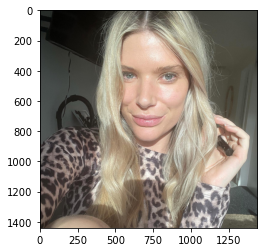

In [69]:
random_file_path = happy_path + "/" + random.choice(os.listdir(happy_path))
plt.imshow(mpimg.imread(random_file_path))

### sad

In [71]:
sad_path = downloaded_data_path + "/sad"

In [72]:
sad_count  = len(os.listdir(sad_path))
print("Number of images for sad face : ",sad_count)

Number of images for sad face :  2180


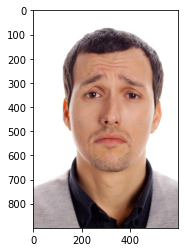

In [83]:
random_file_path = sad_path + "/" + random.choice(os.listdir(sad_path))
plt.imshow(mpimg.imread(random_file_path))

### angry

In [85]:
angry_path = downloaded_data_path + "/angry"

In [86]:
angry_count  = len(os.listdir(angry_path))
print("Number of images for angry face : ",angry_count)

Number of images for angry face :  1131


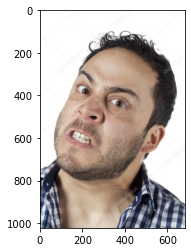

In [103]:
random_file_path = angry_path + "/" + random.choice(os.listdir(angry_path))
plt.imshow(mpimg.imread(random_file_path))

### surprised

In [104]:
surprised_path = downloaded_data_path + "/surprised"

In [106]:
surprised_count  = len(os.listdir(surprised_path))
print("Number of images for surprised face : ",surprised_count)

Number of images for surprised face :  783


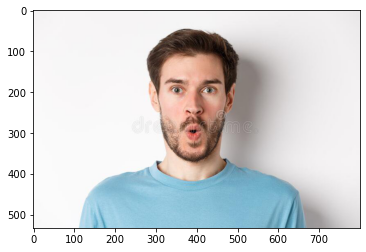

In [110]:
random_file_path = surprised_path + "/" + random.choice(os.listdir(surprised_path))
plt.imshow(mpimg.imread(random_file_path))

### disgusted

In [112]:
disgusted_path = downloaded_data_path + "/disgusted"

In [113]:
disgusted_count  = len(os.listdir(disgusted_path))
print("Number of images for disgusted face : ",disgusted_count)

Number of images for disgusted face :  959


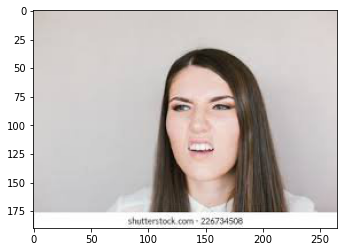

In [133]:
random_file_path = disgusted_path + "/" + random.choice(os.listdir(disgusted_path))
plt.imshow(mpimg.imread(random_file_path))

## Step 4: Pre-processing

### Cropping and face centering image data

- The images downlaod from instagram and google images had a background apart from the face.
- For training we only need the facial data
- So, we used a pre-trained deeplearning network MTCNN to detect faces in the data and cropped out the faces 

In [2]:
import cv2
import sys
import os
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN

In [13]:
class FaceCropper(object):

    def __init__(self):
        self.detector = MTCNN()
    
    def generate(self, image_path,prefix,output_path):
        img = cv2.imread(image_path)
        if (img is None):
            return 0
        faces = self.detector.detect_faces(img)
        for i, face in enumerate(faces): # iterate through all the faces found
            box=face['box']
            if box !=[]:
                confidence = face['confidence']
                if(confidence < 0.9):
                    continue
                # return all faces found in the image
                box[0]= 0 if box[0]<0 else box[0]
                box[1]= 0 if box[1]<0 else box[1]
                
                cropped_img=img[box[1]: box[1]+box[3],box[0]: box[0]+ box[2]]
                try:
                    cv2.imwrite(output_data_path + prefix, cropped_img)
                except Exception as e:
                    pass

In [5]:
%%capture
detecter = FaceCropper()
categories = ["happy", "sad", "angry", "disgusted","surprised"]
data_folder = "/downloaded_data/"
for category in categories:
    input_data_path = os.path.abspath('./') + data_folder + category
    output_data_path = os.path.abspath('./') + "/final_data"

    if not os.path.exists(output_data_path):
        os.mkdir(output_data_path)
    output_data_path = output_data_path + "/" + category + "/"
    if not os.path.exists(output_data_path):
        os.mkdir(output_data_path)
    for filename in os.listdir(input_data_path):
        image_path = input_data_path + "/" + filename
        detecter.generate(image_path,filename,output_data_path)
        break

### Rename data files

- We renamed the data files to ease the process of label creation.
- The files were renamed in the following method -- category_1, category_2 ..
- For examples - happy_0, happy_1 ...

In [1]:
import os

In [2]:
def rename_files(data_path,prefix):
    for count, f in enumerate(os.listdir(data_path)):
        f_name, f_ext = os.path.splitext(f)
        f_name = prefix + "_" +str(count)
 
        new_name = f'{f_name}{f_ext}'
        os.rename(data_path + f, data_path + new_name)

In [3]:
categories = ["sad", "happy", "surprised", "angry", "disgusted"]
for category in categories:
    data_folder = category
    data_path = os.path.abspath('./') + "/" + "/final_data/" + data_folder + "/"
    rename_files(data_path,data_folder)

### Split the data into train and test set
Splitting of data into train and test set in the ratio 70:30.
The data across the 5 categories has been split in stratified manner thus ensuring the same percentage of a category in the train and test set as was in the original dataset.

In [30]:
import torchvision.transforms as T
import random 
import shutil, random, os
from torchvision import datasets
import torch

In [23]:
l = {'angry':240, 'disgusted':224, 'happy':528, 'sad':384, 'surprised':129}

img_folder = os.path.abspath('./') + "/final_data/"
testdestDirectory = os.path.abspath('./')+ "/split_data/" +'/test/'
traindestDirectory = os.path.abspath('./')+ "/split_data/" +'/train/'

for categories in os.listdir(img_folder):
    if categories in l:
        files = [file for file in os.listdir(os.path.join(img_folder, categories))]
        random_files = random.sample(files, l[categories])
        rem = list(set(files)-set(random_files))
        for fname in random_files:
            srcpath = os.path.join(img_folder, categories, fname)
            tsdestDirectory = os.path.join(testdestDirectory, categories)
            if not os.path.exists(tsdestDirectory):
                os.makedirs(tsdestDirectory)
            tsdestDirectory = os.path.join(testdestDirectory, categories,fname)
            shutil.copyfile(srcpath, tsdestDirectory)
        for name in rem:
            srcpath = os.path.join(img_folder, categories, name)
            trdestDirectory = os.path.join(traindestDirectory, categories)
            if not os.path.exists(trdestDirectory):
                os.makedirs(trdestDirectory)
            trdestDirectory = os.path.join(traindestDirectory, categories,name)
            shutil.copyfile(srcpath, trdestDirectory)

### Create dataloader for the image files

In [45]:
def get_dataset_loader(data_dir, img_size, batch_size):
    data_transforms = T.Compose([
                                T.RandomRotation(30),
                                T.RandomHorizontalFlip(),
                                T.Resize(img_size),
                                T.ToTensor()])
    data = datasets.ImageFolder(data_dir, transform=data_transforms)
    dataloader = torch.utils.data.DataLoader(data,batch_size=batch_size, shuffle=True)
    return dataloader

In [46]:
train_dir = os.path.abspath('./')+ "/split_data/" +'/train/'
test_dir = os.path.abspath('./')+ "/split_data/" + '/test/'

train_data_loader = get_dataset_loader(train_dir, (64,64),32)
test_data_loader = get_dataset_loader(test_dir, (64,64),32)

train_data_generator = iter(train_data_loader)
test_data_generator = iter(test_data_loader)

#How to access the images and labels
images,labels = next(train_data_generator)
images,labels = next(test_data_generator)

## Step 5: Data analysis with deep learning

In [42]:
import torch
import numpy as np

In [41]:
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

In [40]:
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)

        print(epoch, val_loss)

## MLP

## CNN

## ANN

## RNN

## Step 6: Numerical results

## References

1. https://medium.com/@wwwanandsuresh/web-scraping-images-from-google-9084545808a2
2. https://gist.github.com/tilfin/98bbba47fdc4ac10c4069cce5fabd834
3. https://github.com/stanford-traffic-sign/stanford-cs230-traffic-sign
4. https://chromedriver.chromium.org/downloads
5. https://www.geeksforgeeks.org/rename-all-file-names-in-your-directory-using-python/
6. https://github.com/dheeraj-sn/facedetect